In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("Attrition Data Exercise.xlsx")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,Educ_bucket,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,EnvironmentSatisfaction_Bucket,Gender,HourlyRate,JobInvolvement,JobInvolvement_bucket,JobLevel,JobRole,JobSatisfaction,JobSatisfaction_bucket,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,RelationshipSatisfaction_bucket,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,WorkLifeBalance_bucket,Company Tenure (yrs),Company Tenure (yrs)_Bucket,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Location
0,41,Yes,Travel_Rarely,1102,Sales,1,2,College,Life Sciences,1,1,2,Medium,Female,94,3,High,2,Sales Executive,4,Very high,Single,5993,19479,8,Y,Yes,11,3,1,Low,80,0,8,0,1,Bad,6,5 to 10 years,4,0,5,India
1,49,No,Travel_Frequently,279,Research & Development,8,1,Below College,Life Sciences,1,2,3,High,Male,61,2,Medium,2,Research Scientist,2,Medium,Married,5130,24907,1,Y,No,23,4,4,Very high,80,1,10,3,3,Better,10,10 to 15 yrs,7,1,7,China
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,College,Other,1,4,4,Very high,Male,92,2,Medium,1,Laboratory Technician,3,High,Single,2090,2396,6,Y,Yes,15,3,2,Medium,80,0,7,3,3,Better,0,Less than 2 years,0,0,0,India
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Masters,Life Sciences,1,5,4,Very high,Female,56,3,High,1,Research Scientist,3,High,Married,2909,23159,1,Y,Yes,11,3,3,High,80,0,8,3,3,Better,8,5 to 10 years,7,3,0,India
4,27,No,Travel_Rarely,591,Research & Development,2,1,Below College,Medical,1,7,1,Low,Male,40,3,High,1,Laboratory Technician,2,Medium,Married,3468,16632,9,Y,No,12,3,4,Very high,80,1,6,3,3,Better,2,3 to 5 yrs,2,2,2,India


#### Less Data Points

In [5]:
data.shape

(1470, 43)

#### No Missing Values, plenty of Objects

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Age                              1470 non-null   int64 
 1   Attrition                        1470 non-null   object
 2   BusinessTravel                   1470 non-null   object
 3   DailyRate                        1470 non-null   int64 
 4   Department                       1470 non-null   object
 5   DistanceFromHome                 1470 non-null   int64 
 6   Education                        1470 non-null   int64 
 7   Educ_bucket                      1470 non-null   object
 8   EducationField                   1470 non-null   object
 9   EmployeeCount                    1470 non-null   int64 
 10  EmployeeNumber                   1470 non-null   int64 
 11  EnvironmentSatisfaction          1470 non-null   int64 
 12  EnvironmentSatisfaction_Bucket   1

#### EmployeeCount and StandardHours have std = 0. Also, EmployeeNumber is not required, Will drop these columns.
#### Varying scales of values, will need to Scale data

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,Company Tenure (yrs),YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Only 1 unique value in Over18, Will drop it.

In [8]:
data.describe(include = 'O')

,Attrition,BusinessTravel,Department,Educ_bucket,EducationField,EnvironmentSatisfaction_Bucket,Gender,JobInvolvement_bucket,JobRole,JobSatisfaction_bucket,MaritalStatus,Over18,OverTime,RelationshipSatisfaction_bucket,WorkLifeBalance_bucket,Company Tenure (yrs)_Bucket,Location
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,5,6,4,2,4,9,4,3,1,2,4,4,5,3
top,No,Travel_Rarely,Research & Development,Bachelor,Life Sciences,High,Male,High,Sales Executive,Very high,Married,Y,No,High,Better,5 to 10 years,USA
freq,1233,1043,961,572,606,453,882,868,326,459,673,1470,1054,459,893,524,741


In [9]:
data.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis = 1, inplace = True)

In [10]:
data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,Educ_bucket,EducationField,EnvironmentSatisfaction,EnvironmentSatisfaction_Bucket,Gender,HourlyRate,JobInvolvement,JobInvolvement_bucket,JobLevel,JobRole,JobSatisfaction,JobSatisfaction_bucket,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,RelationshipSatisfaction_bucket,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,WorkLifeBalance_bucket,Company Tenure (yrs),Company Tenure (yrs)_Bucket,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Location
0,41,Yes,Travel_Rarely,1102,Sales,1,2,College,Life Sciences,2,Medium,Female,94,3,High,2,Sales Executive,4,Very high,Single,5993,19479,8,Yes,11,3,1,Low,0,8,0,1,Bad,6,5 to 10 years,4,0,5,India
1,49,No,Travel_Frequently,279,Research & Development,8,1,Below College,Life Sciences,3,High,Male,61,2,Medium,2,Research Scientist,2,Medium,Married,5130,24907,1,No,23,4,4,Very high,1,10,3,3,Better,10,10 to 15 yrs,7,1,7,China
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,College,Other,4,Very high,Male,92,2,Medium,1,Laboratory Technician,3,High,Single,2090,2396,6,Yes,15,3,2,Medium,0,7,3,3,Better,0,Less than 2 years,0,0,0,India


In [11]:
data.shape

(1470, 39)

#### Imbalanced Dataset, will need to Oversample as data points are less

In [12]:
data.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

<Axes: xlabel='Attrition'>

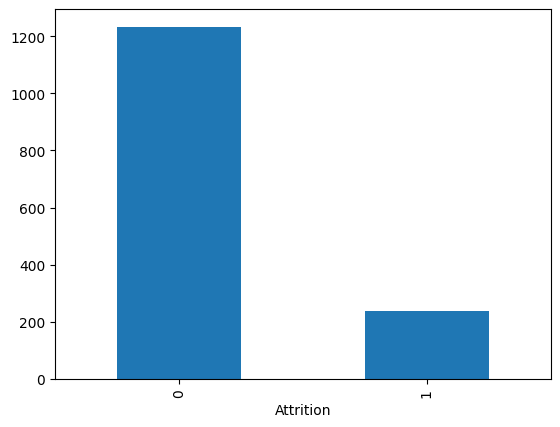

In [34]:
data.Attrition.value_counts().plot(kind = 'bar')

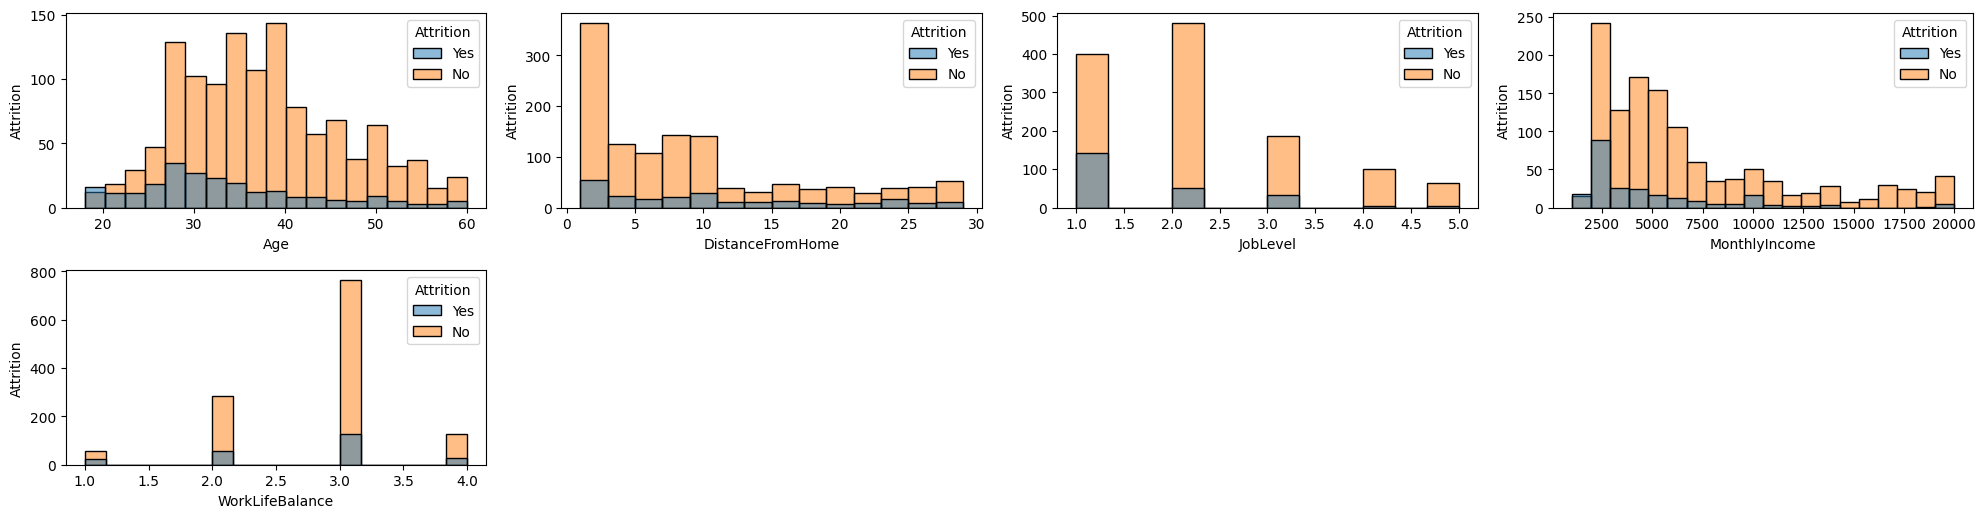

In [13]:
plt.figure(figsize = (20, 10))
num = 1

for col in ['Age', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'WorkLifeBalance']:
    ax = plt.subplot(4, 4, num)
    sns.histplot(x = data[col], hue = data.Attrition)
    plt.xlabel(col)
    plt.ylabel('Attrition')
    num += 1
plt.tight_layout()

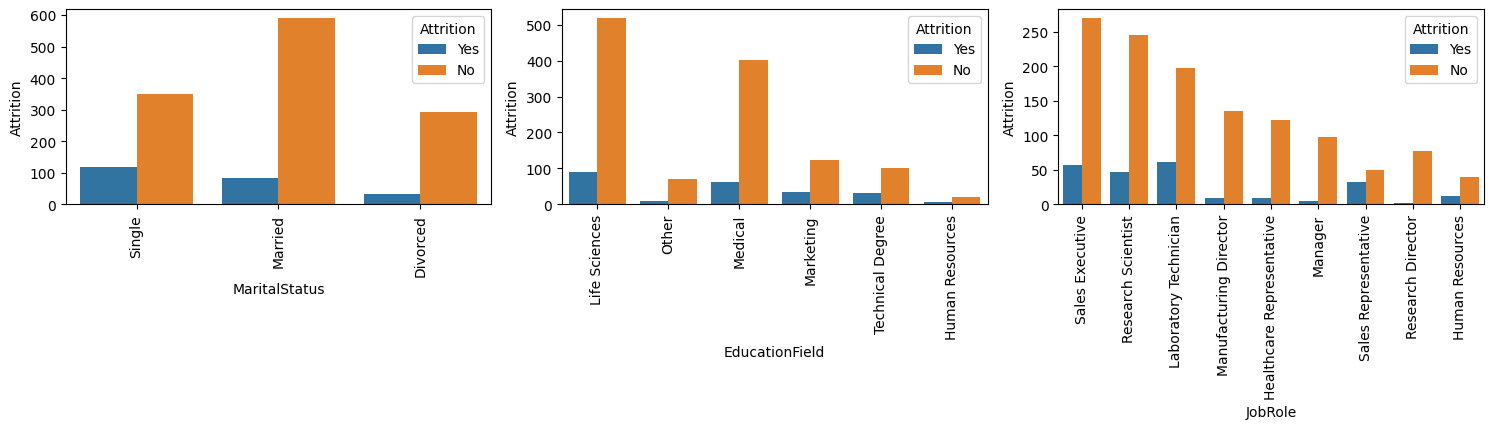

In [14]:
plt.figure(figsize = (20, 15))
num = 1

for col in ['MaritalStatus', 'EducationField', 'JobRole']:
    ax = plt.subplot(4, 4, num)
    sns.countplot(x = data[col], hue = data.Attrition)
    plt.xlabel(col)
    plt.xticks(rotation = 90)
    plt.ylabel('Attrition')
    num += 1
plt.tight_layout()

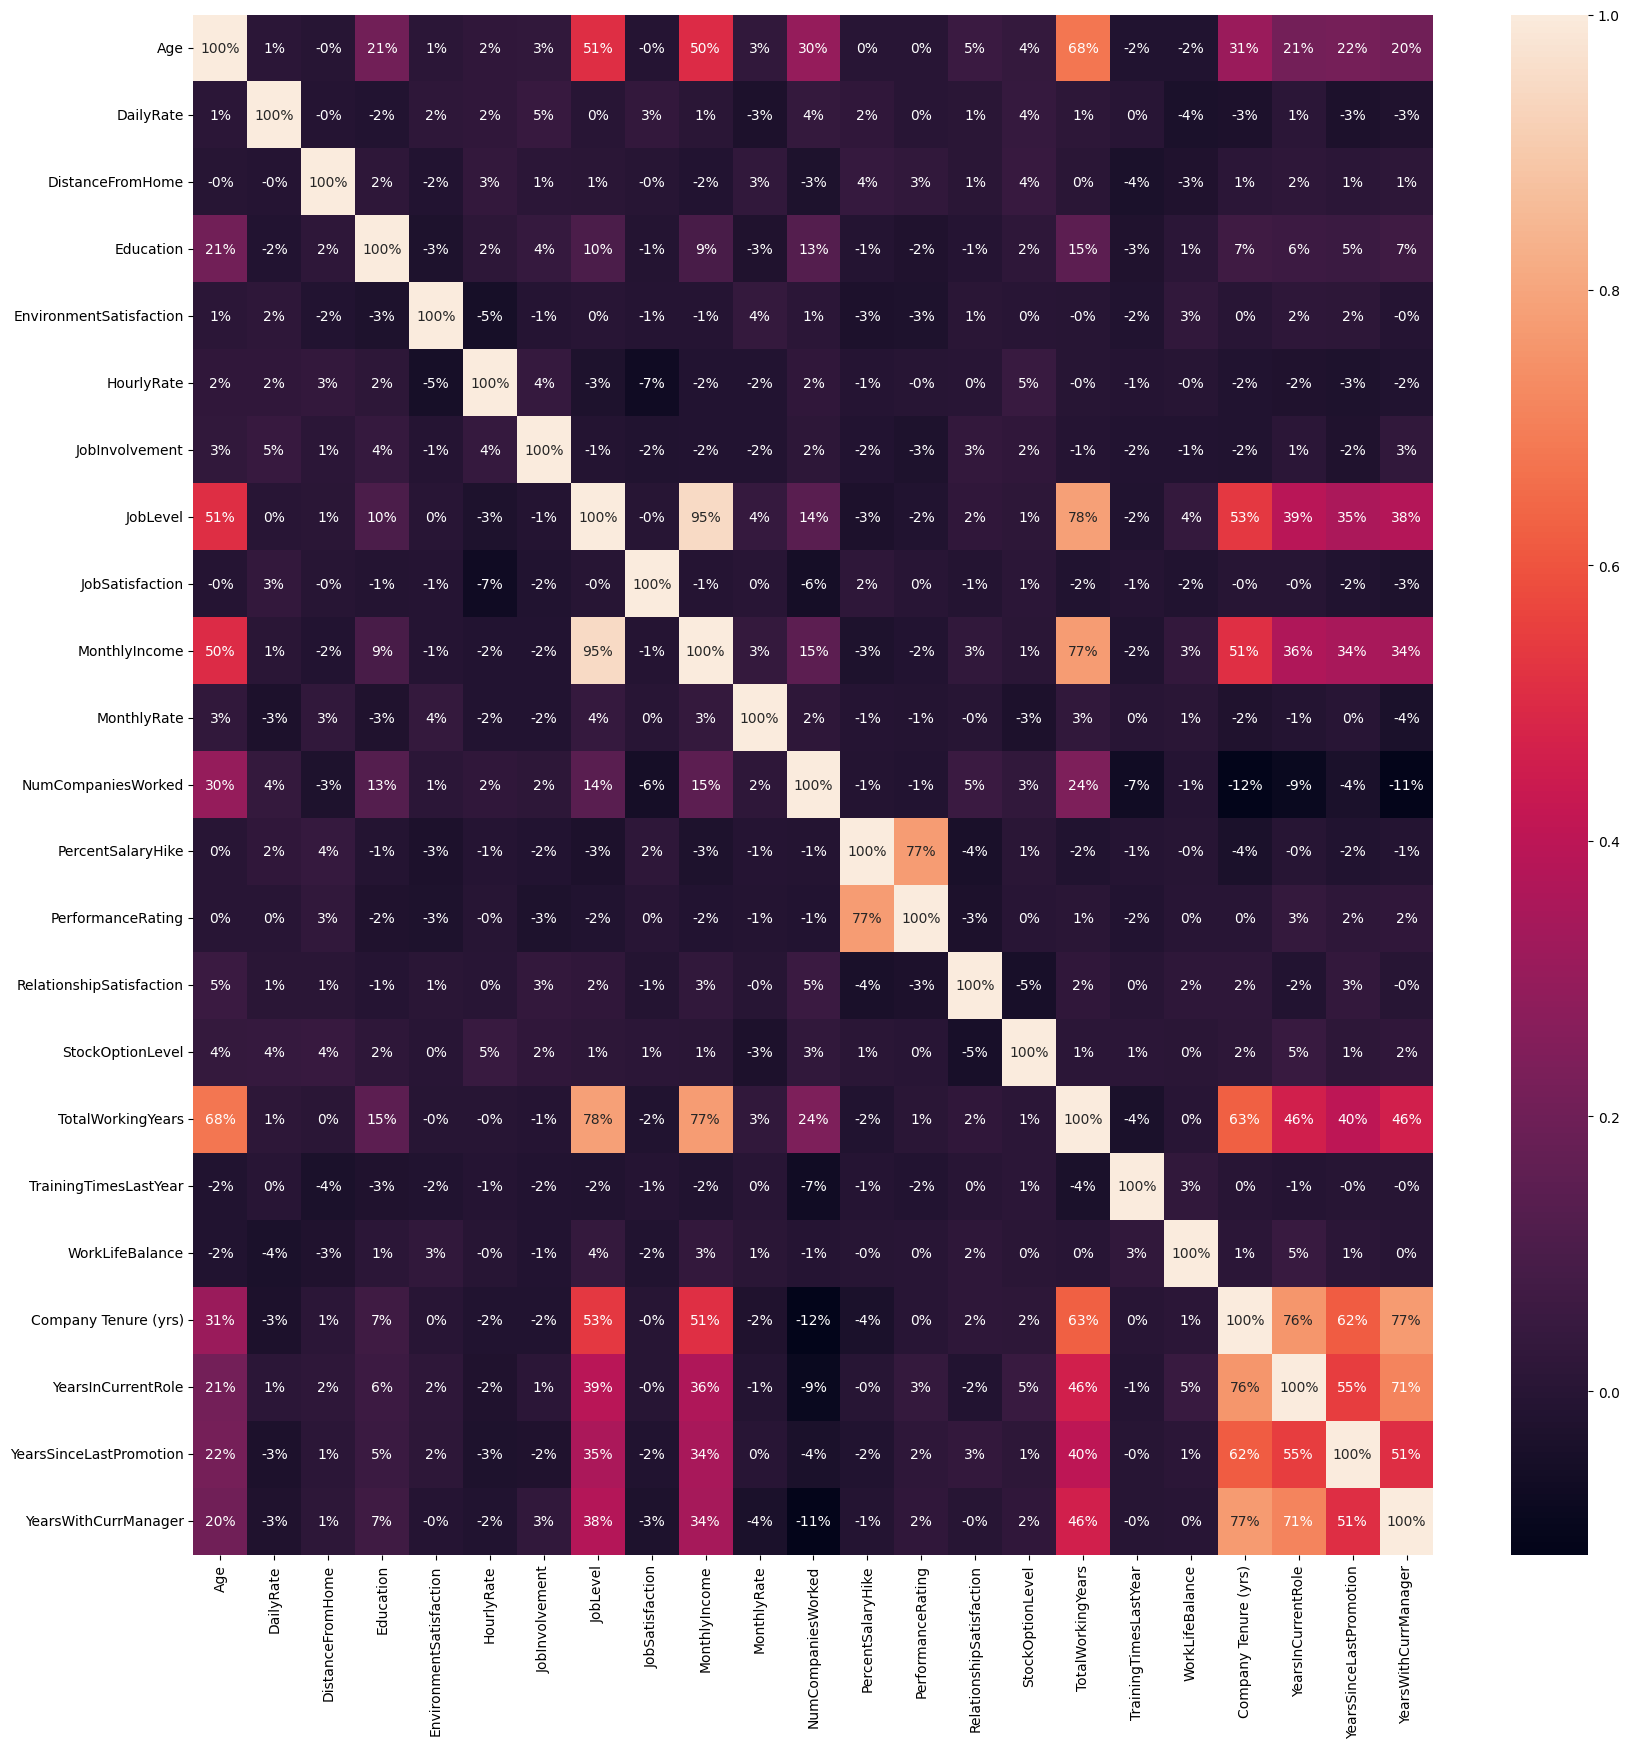

In [15]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(numeric_only = True), annot = True, fmt = '.0%')
plt.show()

In [16]:
data.drop(['Educ_bucket', 'EnvironmentSatisfaction_Bucket', 'JobInvolvement_bucket', 'JobSatisfaction_bucket', 'RelationshipSatisfaction_bucket', 'WorkLifeBalance_bucket', 'Company Tenure (yrs)_Bucket'], axis = 1, inplace = True)

In [17]:
print(data.shape)
data.head(3)

(1470, 32)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,Company Tenure (yrs),YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Location
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,India
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,China
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,India


In [18]:
# Binary - Don't see any order in them
data.Attrition = data.Attrition.replace({'Yes':1, 'No':0})
data.Gender = data.Gender.replace({'Male':1, 'Female':0})
data.OverTime = data.OverTime.replace({'Yes':1, 'No':0})

# Ordinal - Travel Frequency has a certain order to it, I'll consider it as an Ordinal value
data.BusinessTravel = data.BusinessTravel.replace({'Travel_Frequently':2, 'Travel_Rarely':1, 'Non-Travel':0})

In [19]:
data.select_dtypes('object').head() # 5 Categorical variables left, I'll one-hot encode them with the K-1 method

,Department,EducationField,JobRole,MaritalStatus,Location
0,Sales,Life Sciences,Sales Executive,Single,India
1,Research & Development,Life Sciences,Research Scientist,Married,China
2,Research & Development,Other,Laboratory Technician,Single,India
3,Research & Development,Life Sciences,Research Scientist,Married,India
4,Research & Development,Medical,Laboratory Technician,Married,India


In [20]:
data.shape

(1470, 32)

In [21]:
data = pd.get_dummies(data, columns = data.select_dtypes('object').columns, drop_first = True, dtype = 'int')

In [22]:
data.sample(3)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,Company Tenure (yrs),YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Location_India,Location_USA
574,34,0,1,182,1,4,2,0,72,4,1,4,3280,13551,2,0,16,3,3,0,10,2,3,4,2,1,3,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
531,32,0,1,1018,3,2,3,0,39,3,3,4,11159,19373,3,0,15,3,4,0,10,6,3,7,7,7,7,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
933,28,0,1,640,1,3,4,1,84,3,1,1,2080,4732,2,0,11,3,2,0,5,2,2,3,2,1,2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [23]:
data.shape

(1470, 46)

In [24]:
X, y = data.drop('Attrition', axis = 1), data.Attrition

#### As the target class is highly imbalanced, I'll use an over-sampling technique called SMOTE to synthetically balance the classes.

In [25]:
sm = SMOTE()
X_new, y_new = sm.fit_resample(X, y)

In [26]:
y_new.value_counts()

Attrition
1    1233
0    1233
Name: count, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.25) 

#### To avoid Training overhead, I'll scale all values

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### I want to understand Feature importances so I'd like to use a Tree based Classifier

In [29]:
rf = RandomForestClassifier(max_depth = 5, max_features = 10)
rf.fit(X_train, y_train)

print(classification_report(y_test, rf.predict(X_test)))
print("Training Phase Score:\n", f1_score(y_train, rf.predict(X_train)))
print("Testing Phase Score:\n", f1_score(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       320
           1       0.91      0.89      0.90       297

    accuracy                           0.90       617
   macro avg       0.90      0.90      0.90       617
weighted avg       0.90      0.90      0.90       617

Training Phase Score:
 0.913232104121475
Testing Phase Score:
 0.8991452991452992


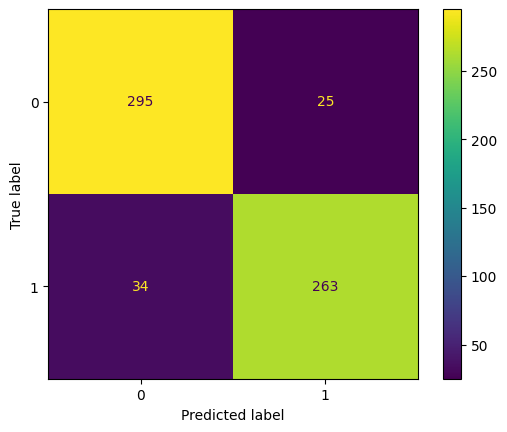

In [30]:
cm_tree = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, rf.predict(X_test)), display_labels = rf.classes_)
cm_tree.plot()
plt.show()

#### Monetary Features, Job Satisfaction, Job Level, Experience and the likes seem to be more prominent in predicting Employee Attrition as expected

<Axes: >

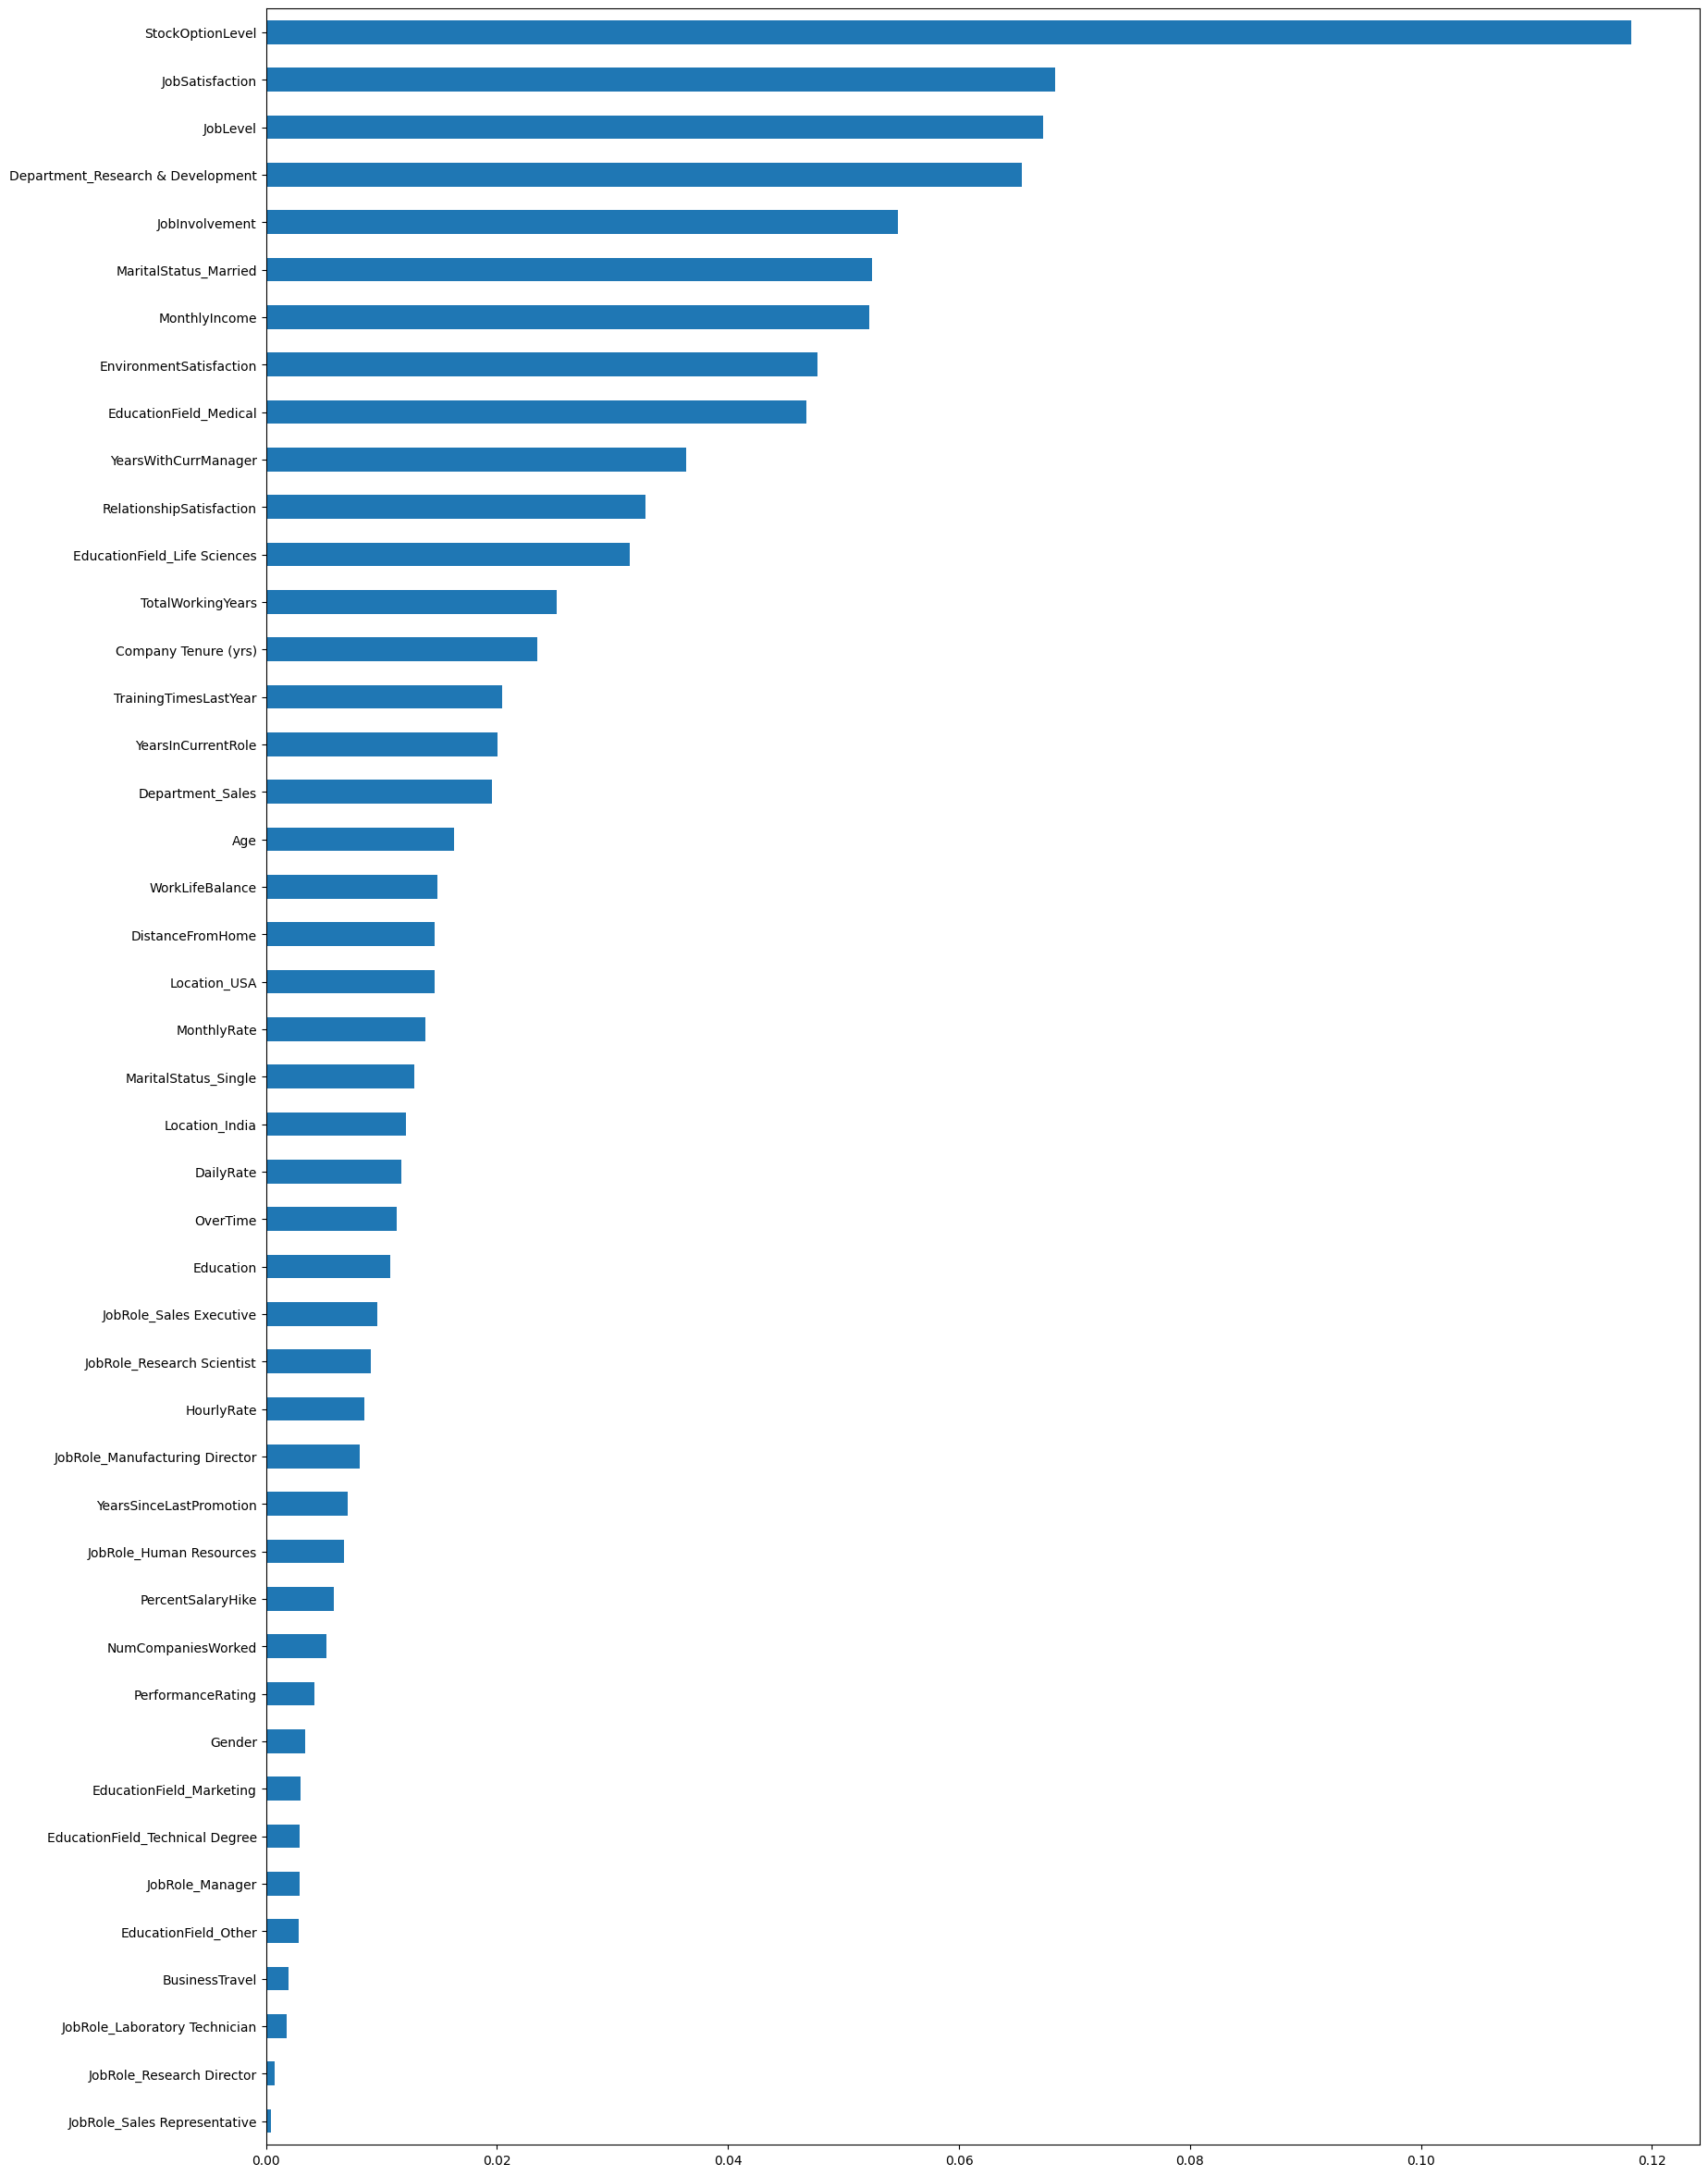

In [31]:
plt.figure(figsize = (20, 30))
imp = pd.Series(rf.feature_importances_, index = X.columns)
imp.sort_values(ascending = True, inplace = True)
imp.plot.barh()

#### I found simple Logistic Regression to be performing well on this Data and could achieve a ~0.9 f1-score.

In [32]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(classification_report(y_test, lr.predict(X_test)))
print("Training Phase Score:\n", f1_score(y_train, lr.predict(X_train)))
print("Testing Phase Score:\n", f1_score(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       320
           1       0.90      0.92      0.91       297

    accuracy                           0.92       617
   macro avg       0.92      0.92      0.92       617
weighted avg       0.92      0.92      0.92       617

Training Phase Score:
 0.9137836353651839
Testing Phase Score:
 0.9133333333333333


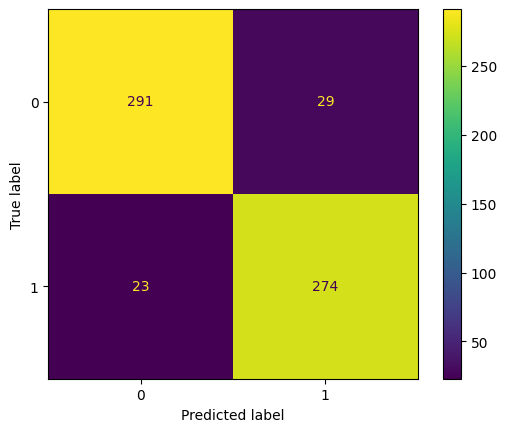

In [33]:
cm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, lr.predict(X_test)), display_labels = lr.classes_)
cm.plot()
plt.show()

Conclusion:

This has been a very interesting case study that can really help the HR team in analyzing which key areas to focus on for Employee retention.
Unfortunately, the Data was heavily biased towards the "No Attrition" Target values. On top of that, there are certain features which have more values in a certain class, which seemed to prevent any concrete judgement, eg. less people work in HR/Sales compared to R&D. If we had almost similar number of examples for all these sub-classes, we would have gotten a more precise understanding of the nuances behind Attrition.

Overall, as things stand, the HR can take help of these findings and try to cater to below cases:

1. Try to appeal to the younger population, with opportunities to work in good Tech stacks. Help them upskill, provide better hikes so they don't want to move out.
2. People in HR/Sales and people working in Labs are perhaps missing out on something which we need to cater to. Be it Job satisfaction, opportunities, Hikes etc.
3. The Company is doing good with Gender distribution

To help further with the analysis, we can take care of below points:

1. We should try to acquire more natural Data for the "Yes Attrition" class.
2. Try to gather balanced data for all Departments, be it HR, Sales, R&D and all roles as well. Looking at majority of examples in Life Sciences, I cannot say for sure if Attrition is more due to more number of workers, or more due to an underlying issue that needs to be addressed. Because, obviously, 50 people leaving out of 100 is not the same as 50 people leaving out of 1000. We need more balanced data covering all variations.
3. If we can get our hands on more features such as Ongoing Mortgage payments/Loans (If someone has a Loan to pay off, they'd prefer to get a higher package soon), Family type (Employees would prefer working closer to home if they have old Parents living with them), Mapping of skills to Projects (a person would prefer working on a Project where his skills are being properly utilized), Overall Employee Friendliness Quotient of the company etc.
4. Few columns are inter-dependent, we can do away with some of them and try to get features which can uniquely identify the Target.